In [13]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

import numpy as np

In [14]:
import traceback
import warnings
import sys

def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

    log = file if hasattr(file,'write') else sys.stderr
    traceback.print_stack(file=log)
    log.write(warnings.formatwarning(message, category, filename, lineno, line))

warnings.showwarning = warn_with_traceback

In [15]:
from modules import BEM_simulation_wrapper as bem
from modules import fitting_misLocalization as fit

## Adding histograms to figure 

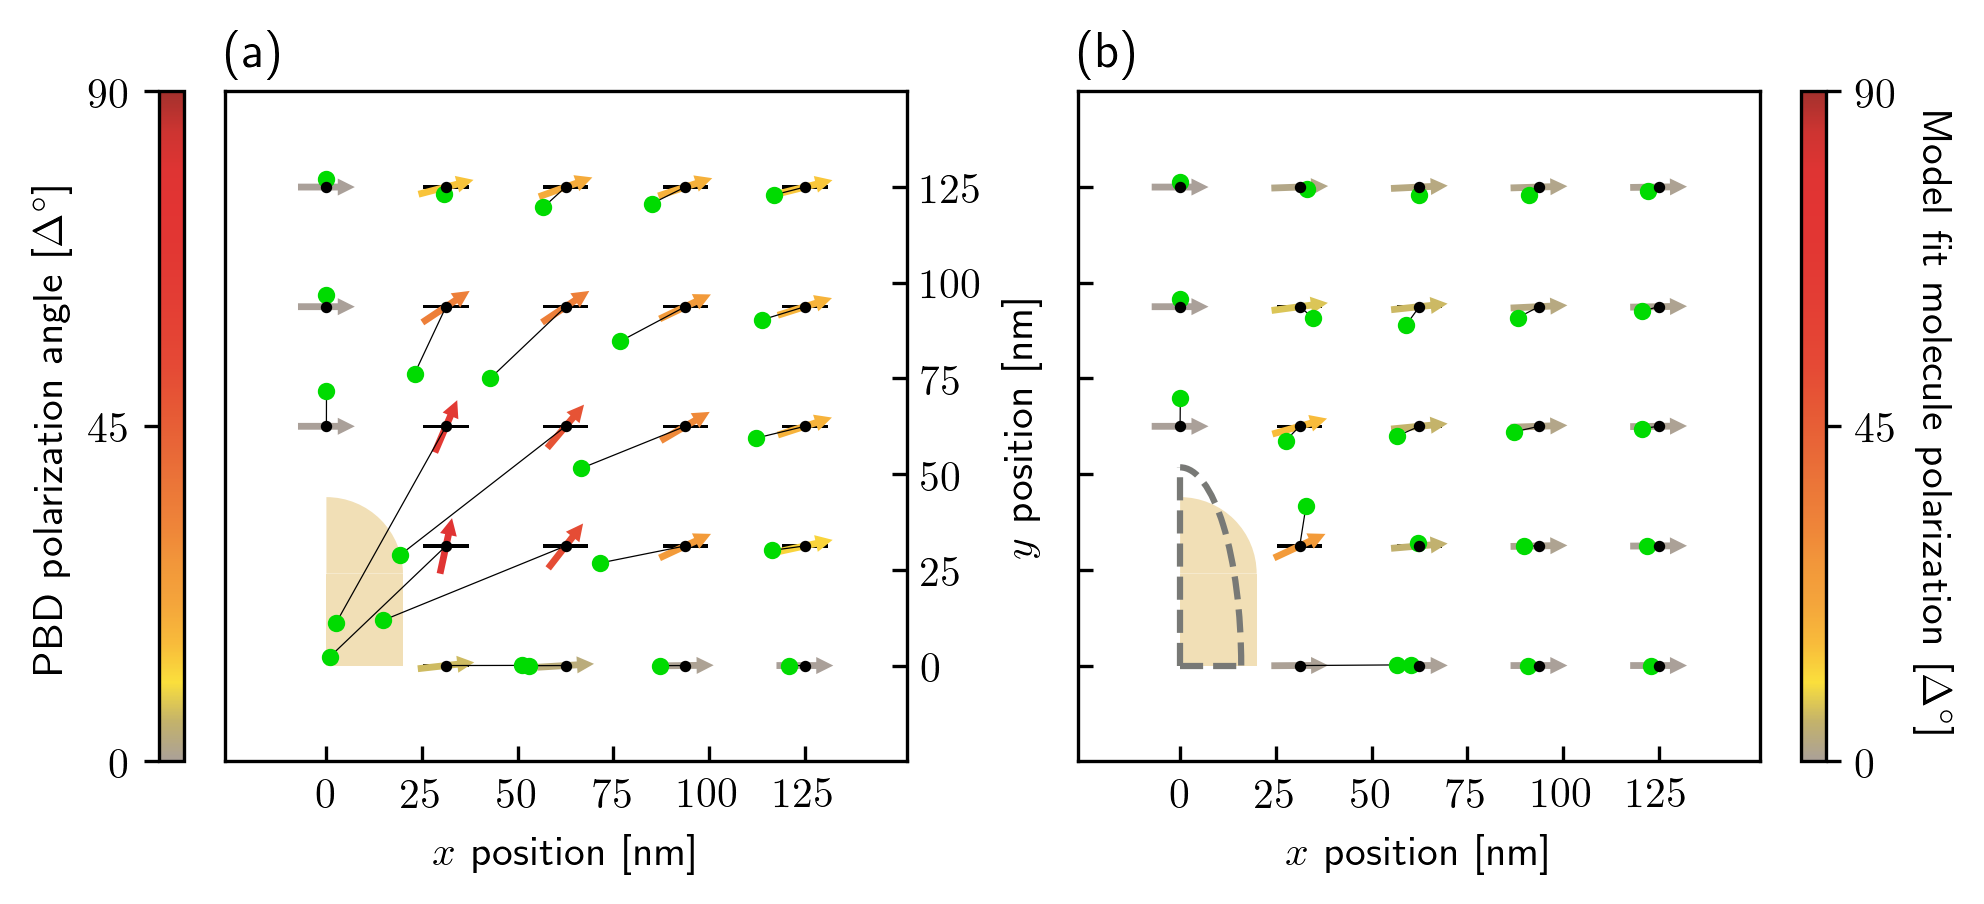

In [16]:
loaded_fit_inst = bem.LoadedFit('fig5/fig5')
fig5 = bem.fig5(loaded_fit_inst.loaded_sim_exp_instance, loaded_fit_inst, draw_quadrant=True)

In [17]:
def map_angles_to_first_quad(angles):
    angle_in_first_quad = np.arctan(
        np.abs(np.sin(angles))
        /
        np.abs(np.cos(angles))
        )
    return angle_in_first_quad

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def fig5_whist(
    exp_instance, 
    fit_model_instance, 
    exp_inst_rand_angle_for_hist,
    fit_inst_rand_angle_for_hist,
    hist_bins=15,
    quiv_ax_limits=[-25,150,-25,150],
    quiv_tick_list=np.linspace(0,125,6),
    quiv_ticklabel_list=[r'$0$', r'$25$',r'$50$',r'$75$',r'$100$',r'$125$'],
    fig_size=(6.5, 3.9),
    ):
    
    # Establish height and widths for subplot grid
    cbar_width = 0.15
    plot_width = 4
    widths = [cbar_width, plot_width, plot_width, cbar_width]
    
    hist_height = 1
    plot_height = 3
    heights = [hist_height, plot_height]
    
    gs_kw = dict(width_ratios=widths, height_ratios=heights)

    # Build figure and assign axes
    paper_fig, paper_axs = plt.subplots(
        nrows=2, 
        ncols=4, 
    #     sharey=True, 
        figsize=fig_size, 
        dpi=300, 
        constrained_layout=True,
        gridspec_kw=gs_kw
        )

    left_ax = exp_instance.plot_mispol_map_wMisloc(given_ax=paper_axs[1,1]) 
    left_ax.yaxis.tick_right()
    left_ax.yaxis.set_label_position("right")
    # left_ax.set_title(None)

    right_ax = fit_model_instance.plot_fit_results_as_quiver_map(exp_instance, given_ax=paper_axs[1,2])  
    # right_ax.set_title(None)

    fit_model_instance.build_colorbar(
        paper_axs[1,0],
        r'PBD polarization angle [$\Delta^\circ$]',
        fit.PlottingStuff.curlycm
        )

    fit_model_instance.build_colorbar(
        paper_axs[1,3],
        'Molecule angle by model fit [deg]',
        fit.PlottingStuff.curlycm
        )

    paper_axs[1,0].yaxis.tick_left()
    paper_axs[1,0].yaxis.set_label_position("left")

    # Legends
    def loc_map_legend(ax, loc_label='fit localization'):
        legend_elements = [
            mpl.lines.Line2D(
                [0], [0], 
                marker='o', 
                color='w', 
                label=loc_label,
                markerfacecolor=fit.PlottingStuff.a_shade_of_green, 
                markersize=10
                ),
            mpl.lines.Line2D(
                [0], [0], 
                marker='o', 
                color='w', 
                label='molecule location',
                markerfacecolor='black', 
                markersize=8
                ),
            ]

        ax.legend(
            handles=legend_elements, 
            loc='upper right',
            bbox_to_anchor=(1,1.11), 
    #         ncol=2, mode="expand",
            fontsize=8,
            framealpha=1,
    #         loc=1
            )

    # loc_map_legend(paper_axs[1,1])
    loc_map_legend(paper_axs[1,2], loc_label='fit localization')

    # Title
    paper_axs[1,1].set_title(None)
    paper_axs[1,1].set_title('(a)', loc='left')
    paper_axs[1,2].set_title(None)
    paper_axs[1,2].set_title('(b)', loc='left')

    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    # Quick and dirty fixes 
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

    # rotate right colorbar label
    paper_axs[1,3].set_ylabel(None)
    # paper_axs[1,3].yaxis.set_label_position("right")
    paper_axs[1,3].set_ylabel(r'Model fit molecule polarization [$\Delta^\circ$]',rotation=270,va="bottom")

    for cbar_ax in [paper_axs[1,3],paper_axs[1,0]]:
    #     cbar_ax.yaxis.set_ticks(np.linspace(0,np.pi/2,10))
    #     cbar_ax.yaxis.set_ticklabels(
    #         [r'$0$', r'$10$',r'$20$',r'$30$',r'$40$',r'$50$',r'$60$',r'$70$',r'$80$',r'$90$',]
    #         )
        cbar_ax.yaxis.set_ticks(np.linspace(0,np.pi/2,3))
        cbar_ax.yaxis.set_ticklabels(
            [r'$0$', r'$45$',r'$90$',]
            )

    # Redo quiver ticks
    for quiver_ax in [paper_axs[1,i+1] for i in range(2)]:
        quiver_ax.tick_params(direction='in'),

    #     quiver_ax.set_ylim([-10,165])
        # set axis equal
        quiver_ax.axis('equal')
        quiver_ax.axis(quiv_ax_limits)

        quiver_ticks = np.linspace(0,125,5)
        for quiver_axis in [quiver_ax.yaxis, quiver_ax.xaxis]:
            quiver_axis.set_ticks(quiv_tick_list)
            quiver_axis.set_ticklabels(
                quiv_ticklabel_list
                )       

        # fix labels
        quiver_ax.set_xlabel(r'$x$ position [nm]')
        quiver_ax.set_ylabel(r'$y$ position [nm]')

    # Through out y-ticks and labels for the right quiver plot
    right_ax.set_ylabel(None)
    right_ax.yaxis.set_ticklabels([None])

    #---------------------------------------------------------
    # Histograms
    #---------------------------------------------------------
    
    for anax in [paper_axs[0,0], paper_axs[0,-1]]:
        anax.remove()
    
#     paper_axs[0,0].hist(
#         exp_inst_rand_angle_for_hist
#         )
    
    paper_axs[0,1].hist(
        exp_inst_rand_angle_for_hist.mispol_angle,
#         randAngle125_shr_fit_instance_few_mol.model_fit_results[:,2],
        bins=hist_bins
        )

    paper_axs[0,1].hist(
        map_angles_to_first_quad(
            exp_inst_rand_angle_for_hist.mol_angles
            ),
        alpha=.5,
        bins=hist_bins
        )
    
    # Panel B: the model results
    paper_axs[0,2].hist(
#         exp_inst_rand_angle_for_hist.mispol_angle
        fit_inst_rand_angle_for_hist.model_fit_results[:,2],
        bins=hist_bins
        )

    paper_axs[0,2].hist(
        map_angles_to_first_quad(
            exp_inst_rand_angle_for_hist.mol_angles
            ),
        alpha=.5,
        bins=hist_bins
        )
    
    # Through out y-ticks and labels for right histogram
    paper_axs[0,2].set_ylabel(None)
    paper_axs[0,2].yaxis.set_ticklabels([None])
    
    # Iterate through histogram axes
    for histax in [paper_axs[0,i] for i in [1,2]]:     

        # Tick histograms in angles from 0 to 90
        histax.set_xlabel(r'polarization angle [$\Delta^\circ$]')
        histax.xaxis.set_ticks(np.linspace(0,90,3)*(np.pi/180))
        histax.xaxis.set_ticklabels(['0', '45', '90'])
        
        # Change yaxis to probability
    

In [23]:
loaded_fit_randAngles = bem.LoadedFit('fig5/randAngle125_shr')

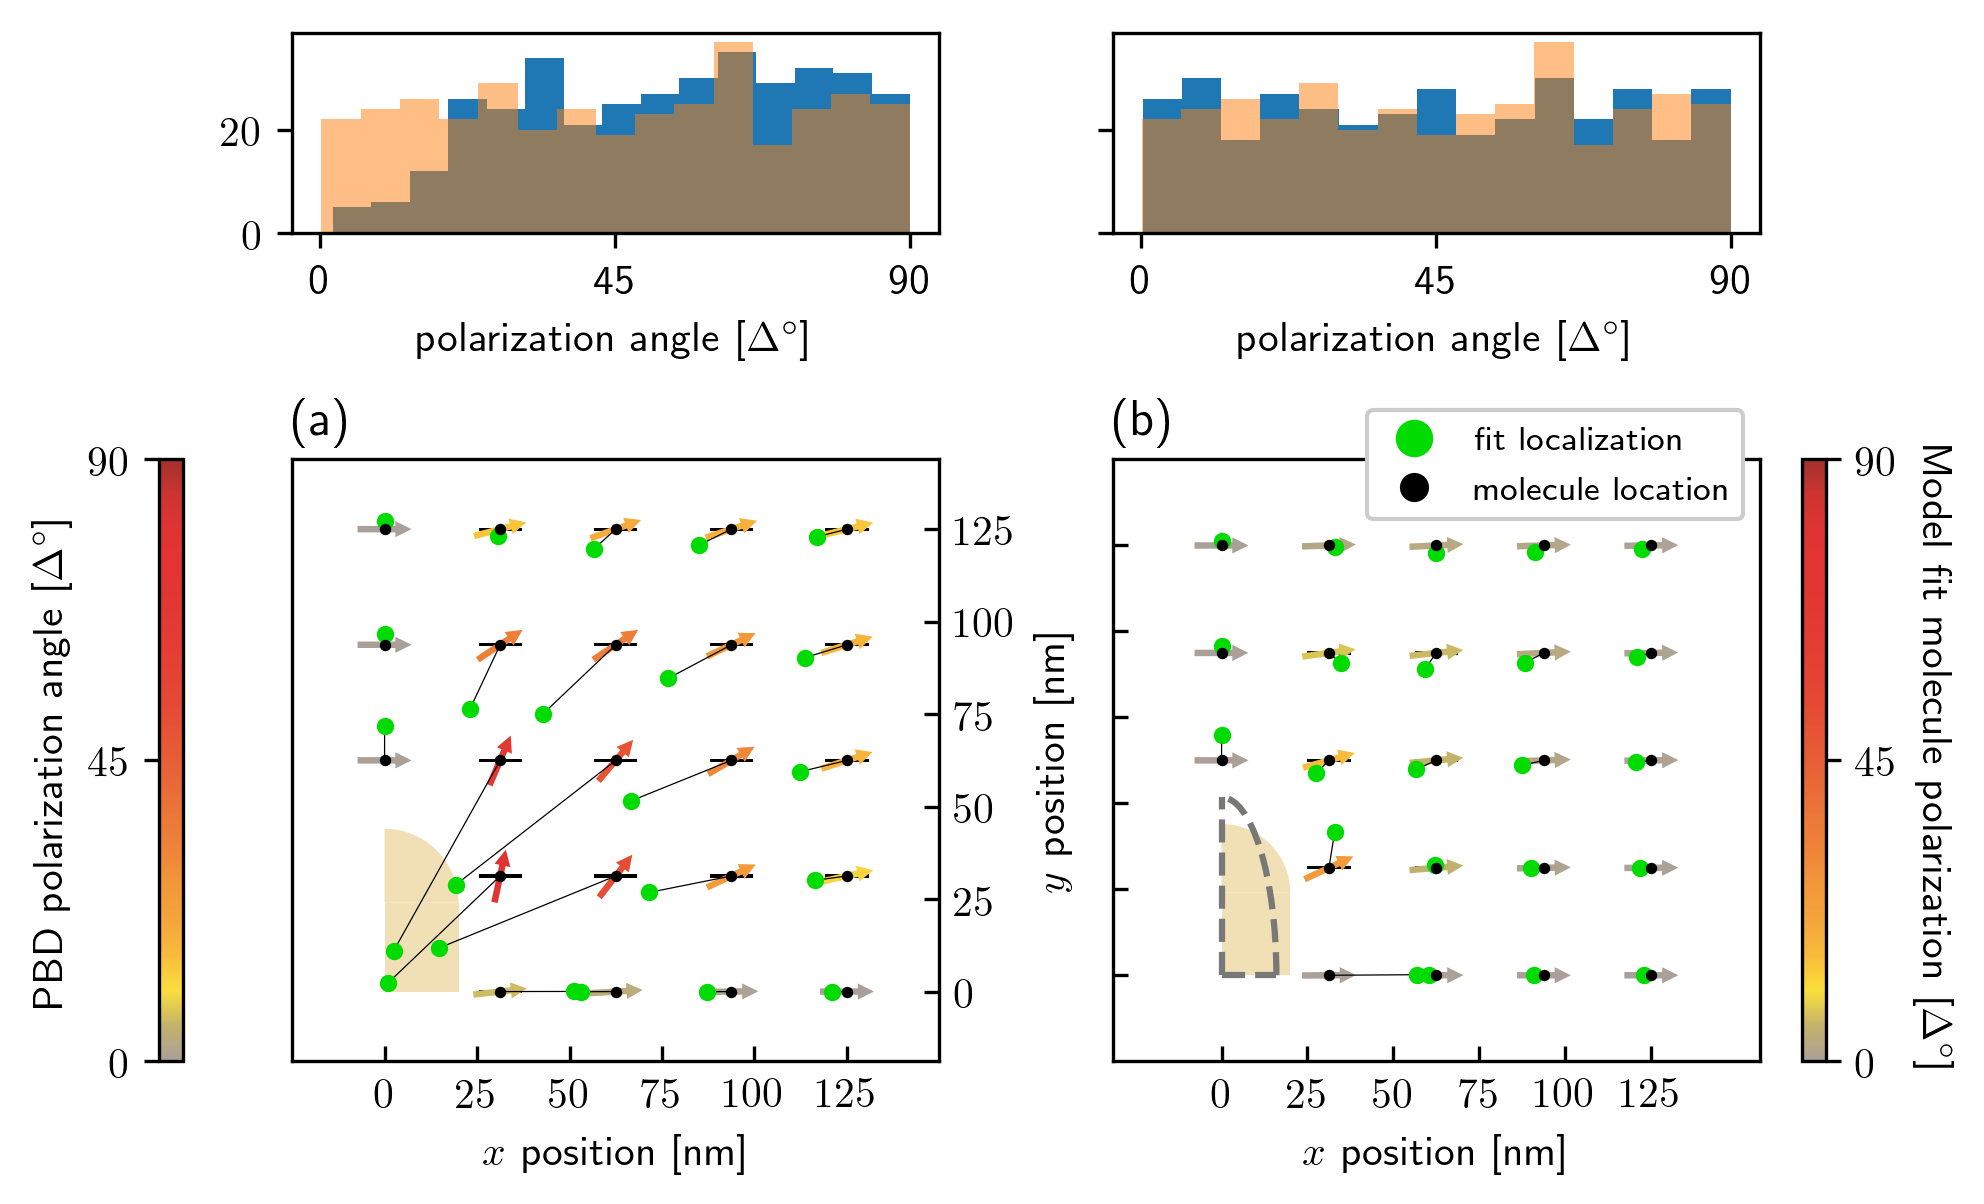

In [26]:
fig5_whist(
    loaded_fit_inst.loaded_sim_exp_instance, 
    loaded_fit_inst,
    loaded_fit_randAngles.loaded_sim_exp_instance,
    loaded_fit_randAngles, 
#     [-20,160,-20,160],
#     quiv_tick_list=np.linspace(0,300,3),
#     quiv_ticklabel_list=[r'$0$', r'$150$',r'$300$'],
#     fig_size=(6.5, 2.8)
    )

In [27]:
# Visualize random angle results
# loaded_fit_randAngles.loaded_sim_exp_instance.plot_mispol_map()

## PBD polarization histograms

In [55]:
# locations_125, angles_125 = fixed_ori_mol_placement(mol_grid_pts_1D=6, x_max=125, y_max=125)

locations_randAngle125, randAngle125 = fit.random_ori_mol_placement(
    mol_grid_pts_1D=6, 
    x_max=125, 
    y_max=125,
)

simTestInst_few_mol_randAngle125 = SimulatedExperiment(
    locations_randAngle125, mol_angle=random_angles_125)
simTestInst_few_mol_randAngle125.trial_images = simTestInst_few_mol_randAngle125.calculate_BEM_fields()



starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields
4th molecule
calculating diffracted fields
5th molecule
calculating diffracted fields
6th molecule
calculating diffracted fields
7th molecule
calculating diffracted fields
8th molecule
calculating diffracted fields
9th molecule
calculating diffracted fields
10th molecule
calculating diffracted fields
11th molecule
calculating diffracted fields
12th molecule
calculating diffracted fields
13th molecule
calculating diffracted fields
14th molecule
calculating diffracted fields
15th molecule
calculating diffracted fields
16th molecule
calculating diffracted fields
17th molecule
calculating diffracted fields
18th molecule
calculating diffracted fields
19th molecule
calculating diffracted fields
20th molecule
calculating diffracted fields
21th molecule
calculating diffracted fields


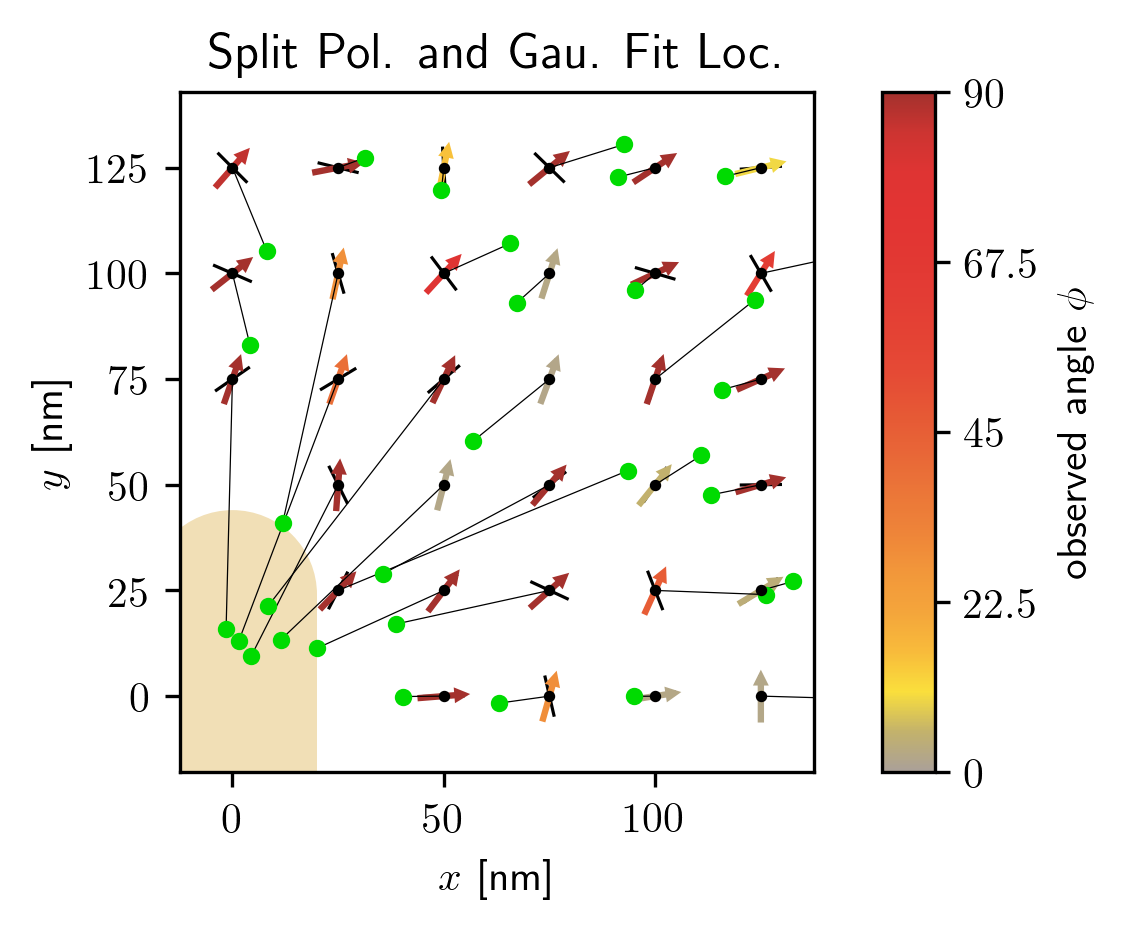

In [57]:
simTestInst_few_mol_randAngle125.plot_mispol_map_wMisloc()

In [58]:
simTestInst_few_mol_randAngle125.mispol_angle

array([1.23790599, 0.66840486, 0.85158815, 0.80690944, 1.49511122,
       1.23051271, 1.35737447, 0.18938313, 0.07917287, 0.92472541,
       1.31562472, 1.12714372, 0.82908715, 1.36774425, 1.29427344,
       0.72960208, 0.86691417, 1.21642514, 1.26076703, 0.68801205,
       0.15470516, 1.14424778, 0.8918718 , 1.24443028, 0.44245182,
       0.58981072, 1.57079633, 0.54406496, 0.28679674, 0.41760822,
       1.01118935, 0.24151095])

In [46]:

def map_angles_to_first_quad(angles):
    angle_in_first_quad = np.arctan(
        np.abs(np.sin(angles))
        /
        np.abs(np.cos(angles))
        )
    return angle_in_first_quad

(array([3., 3., 3., 4., 3., 3., 2., 3., 6., 2.]),
 array([0.01352777, 0.16555641, 0.31758504, 0.46961368, 0.62164232,
        0.77367095, 0.92569959, 1.07772823, 1.22975686, 1.3817855 ,
        1.53381414]),
 <a list of 10 Patch objects>)

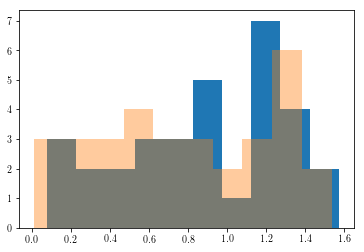

In [64]:
plt.hist(simTestInst_few_mol_randAngle125.mispol_angle)
plt.hist(
    map_angles_to_first_quad(
        simTestInst_few_mol_randAngle125.mol_angles
        ),
    alpha=.4)

### Going higher res

### Plotting histograms

In [30]:
def plot_hist_true_appar(inst, bins=20):

    if type(inst) is fit.FitModelToData:
        angle_attr_str = inst.model_fit_results[:,2]
        mol_angles = inst.mol_angle
    elif (type(inst) is LoadedSimExp) or (type(inst) is SimulatedExperiment):
        angle_attr_str = inst.mispol_angle
        mol_angles = inst.mol_angles
        
#     fig, axs = plt.subplots(
#         fig_size=(6.5, 2.9)
#         )
    plt.hist(
        angle_attr_str,
        bins=bins)
    plt.hist(
        map_angles_to_first_quad(
            mol_angles
            ),
        alpha=.5,
        bins=bins
        )
    
    return plt.gca()

In [55]:
type(loaded_randAngle125_shr)

__main__.LoadedSimExp

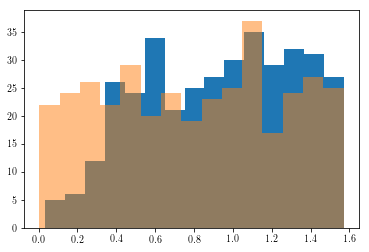

In [68]:
plot_hist_true_appar(loaded_randAngle125_shr, bins=15)

In [64]:
randAngle125_shr_fit_instance_few_mol.mol_angle

0

(array([22., 24., 26., 22., 29., 20., 24., 19., 23., 25., 37., 17., 24.,
        27., 25.]),
 array([0.00435244, 0.1087209 , 0.21308936, 0.31745782, 0.42182628,
        0.52619474, 0.63056319, 0.73493165, 0.83930011, 0.94366857,
        1.04803703, 1.15240549, 1.25677394, 1.3611424 , 1.46551086,
        1.56987932]),
 <a list of 15 Patch objects>)

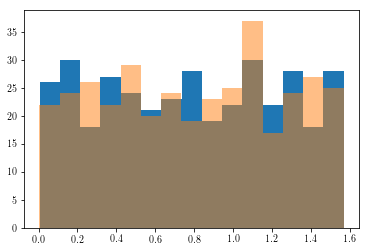

In [69]:
bins=15

plt.hist(
    randAngle125_shr_fit_instance_few_mol.model_fit_results[:,2],
    bins=bins)

plt.hist(
    map_angles_to_first_quad(
        loaded_randAngle125_shr.mol_angles
        ),
    alpha=.5,
    bins=bins
    )



In [54]:
type(randAngle125_shr_fit_instance_few_mol)

fitting_misLocalization.FitModelToData

Let do some more for the smooths

In [70]:
# locations_125, angles_125 = fixed_ori_mol_placement(mol_grid_pts_1D=6, x_max=125, y_max=125)

locations_randAngle125_sshr, randAngle125_sshr = fit.random_ori_mol_placement(
    mol_grid_pts_1D=30, 
    x_max=125, 
    y_max=125,
)

simTestInst_randAngle125_sshr = SimulatedExperiment(
    locations_randAngle125_sshr, 
    mol_angle=randAngle125_sshr
    )
simTestInst_randAngle125_sshr.trial_images = simTestInst_randAngle125_sshr.calculate_BEM_fields()



starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields
4th molecule
calculating diffracted fields
5th molecule
calculating diffracted fields
6th molecule
calculating diffracted fields
7th molecule
calculating diffracted fields
8th molecule
calculating diffracted fields
9th molecule
calculating diffracted fields
10th molecule
calculating diffracted fields
11th molecule
calculating diffracted fields
12th molecule
calculating diffracted fields
13th molecule
calculating diffracted fields
14th molecule
calculating diffracted fields
15th molecule
calculating diffracted fields
16th molecule
calculating diffracted fields
17th molecule
calculating diffracted fields
18th molecule
calculating diffracted fields
19th molecule
calculating diffracted fields
20th molecule
calculating diffracted fields
21th molecule
calculating diffracted fields


In [75]:
simTestInst_randAngle125_sshr.calculate_polarization()
save_sim_exp_inst(simTestInst_randAngle125_sshr,'simTestInst_randAngle125_sshr')

In [74]:
simTestInst_randAngle125_sshr.mispol_angle.shape

(822,)

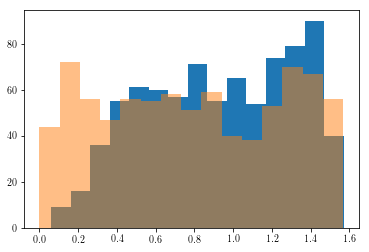

In [78]:
plot_hist_true_appar(simTestInst_randAngle125_sshr, bins=15)

In [ ]:
# locations_125, angles_125 = fixed_ori_mol_placement(mol_grid_pts_1D=6, x_max=125, y_max=125)

locations_randAngle125_100shr, randAngle125_100shr = fit.random_ori_mol_placement(
    mol_grid_pts_1D=100, 
    x_max=125, 
    y_max=125,
)

simTestInst_randAngle125_100shr = SimulatedExperiment(
    locations_randAngle125_100shr, 
    mol_angle=randAngle125_100shr
    )
simTestInst_randAngle125_100shr.trial_images = simTestInst_randAngle125_100shr.calculate_BEM_fields()



starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields
4th molecule
calculating diffracted fields
5th molecule
calculating diffracted fields
6th molecule
calculating diffracted fields
7th molecule
calculating diffracted fields
8th molecule
calculating diffracted fields
9th molecule
calculating diffracted fields
10th molecule
calculating diffracted fields
11th molecule
calculating diffracted fields
12th molecule
calculating diffracted fields
13th molecule
calculating diffracted fields
14th molecule
calculating diffracted fields
15th molecule
calculating diffracted fields
16th molecule
calculating diffracted fields
17th molecule
calculating diffracted fields
18th molecule
calculating diffracted fields
19th molecule
calculating diffracted fields
20th molecule
calculating diffracted fields
21th molecule
calculating diffracted fields


## Going to run some local histograms by evenly spacing molecules in angle so the histograms look smooth

In [ ]:
# Code to make the fig 4 (old fig 5) in paper
# locations_100, angles_100 = fit.fixed_ori_mol_placement(mol_grid_pts_1D=5, x_max=125, y_max=125)
# simTestInst_few_mol_h_100 = bem.SimulatedExperiment(locations_100, mol_angle=0)
# simTestInst_few_mol_h_100.trial_images = simTestInst_few_mol_h_100.calculate_BEM_fields()

# simTestInst_few_mol_h_100.plot_mispol_map_wMisloc()

starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields


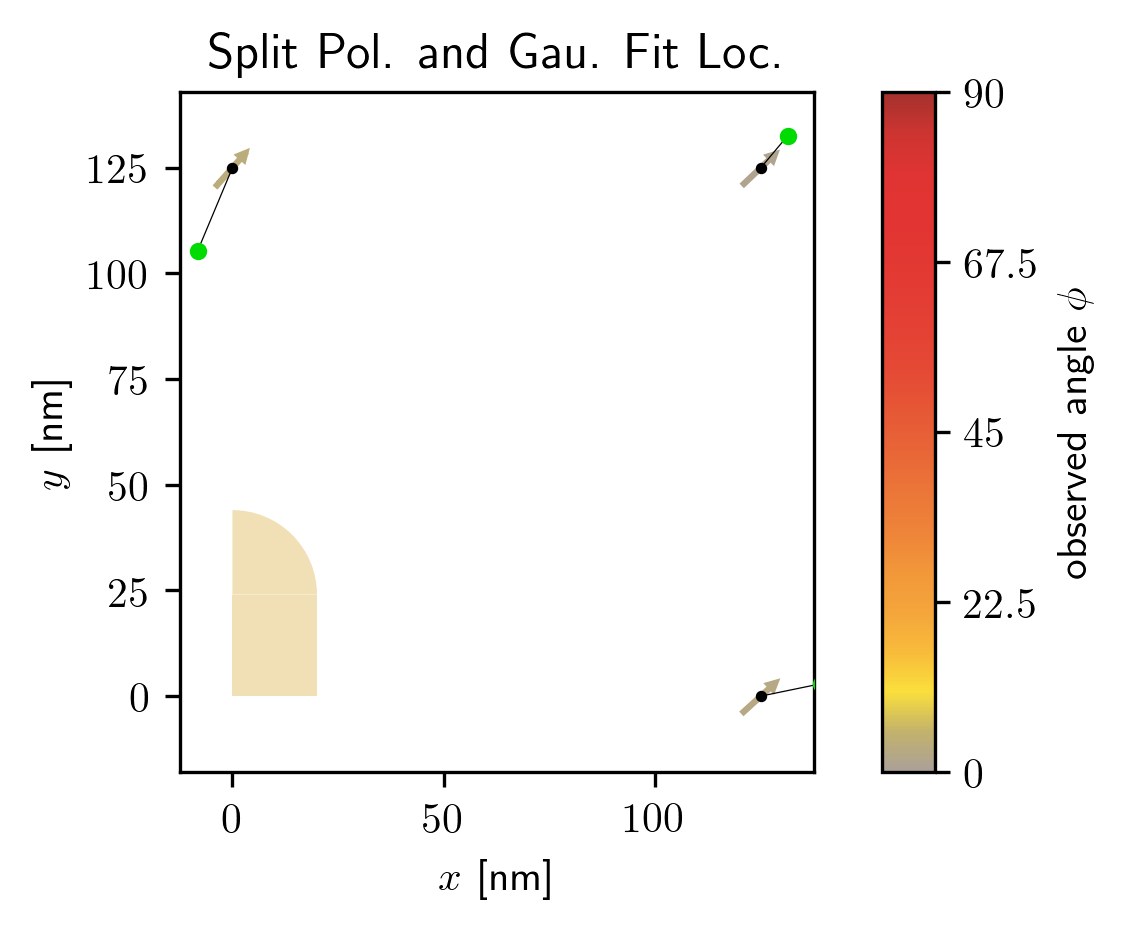

In [29]:
locations, angles = fit.fixed_ori_mol_placement(mol_grid_pts_1D=2, x_max=125, y_max=125, mol_angle=np.pi/4)
simTestInst_few_mol_h_100 = bem.SimulatedExperiment(locations, mol_angle=angles)
simTestInst_few_mol_h_100.trial_images = simTestInst_few_mol_h_100.calculate_BEM_fields()

simTestInst_few_mol_h_100.plot_mispol_map_wMisloc()

In [95]:
# Generate even spread of angles

angle_spread = np.linspace(0,np.pi/2, 15)

locations_0, angles_0 = fit.fixed_ori_mol_placement(
    mol_grid_pts_1D=5, 
    x_max=300, 
    y_max=300, 
    mol_angle=angle_spread[0]
    )

if np.atleast_1d(angles_0).shape == (1,):
    angles_0 = np.ones((locations_0.shape[0]))*angles_0


for i in range(1, len(angle_spread)):

    locations, angles = fit.fixed_ori_mol_placement(
        mol_grid_pts_1D=5, 
        x_max=300, 
        y_max=300, 
        mol_angle=angle_spread[i]
        )
    
    if np.atleast_1d(angles).shape == (1,):
        angles = np.ones((locations.shape[0]))*angles

        
    locations_0 = np.vstack((locations_0, locations))
    angles_0 = np.hstack((angles_0, angles))


angles_0.shape, locations_0.shape  (25,) (25, 3)
(25,) (25, 3)
(50,) (50, 3)
(25,) (25, 3)
(75,) (75, 3)
(25,) (25, 3)
(100,) (100, 3)
(25,) (25, 3)
(125,) (125, 3)
(25,) (25, 3)
(150,) (150, 3)
(25,) (25, 3)
(175,) (175, 3)
(25,) (25, 3)
(200,) (200, 3)
(25,) (25, 3)
(225,) (225, 3)
(25,) (25, 3)
(250,) (250, 3)
(25,) (25, 3)
(275,) (275, 3)
(25,) (25, 3)
(300,) (300, 3)
(25,) (25, 3)
(325,) (325, 3)
(25,) (25, 3)
(350,) (350, 3)
(25,) (25, 3)
(375,) (375, 3)


In [ ]:
sim_inst_even_angl = bem.SimulatedExperiment(locations_0, mol_angle=angles_0)
sim_inst_even_angl.calculate_BEM_fields()

fit_inst_even_angl = fit.FitModelToData(
    sim_inst_even_angl.BEM_images, 
    ini_guess='gauss'
    )

sim_inst_even_angl.fit_model_to_image_data(check_ini=True)

starting Matlab...
given even number of points for Fibonacci lattice, 
  adding 1...
1th molecule
calculating diffracted fields
2th molecule
calculating diffracted fields
3th molecule
calculating diffracted fields
4th molecule
calculating diffracted fields
5th molecule
calculating diffracted fields
6th molecule
calculating diffracted fields
7th molecule
calculating diffracted fields
8th molecule
calculating diffracted fields
9th molecule
calculating diffracted fields
10th molecule
calculating diffracted fields
11th molecule
calculating diffracted fields
12th molecule
calculating diffracted fields
13th molecule
calculating diffracted fields
14th molecule
calculating diffracted fields
15th molecule
calculating diffracted fields
16th molecule
calculating diffracted fields
17th molecule
calculating diffracted fields
18th molecule
calculating diffracted fields
19th molecule
calculating diffracted fields
20th molecule
calculating diffracted fields
21th molecule
calculating diffracted fields
